In [59]:
#####################
# Library Loading
#####################
library(tidyverse)
library(cowplot)
library(readxl)
library(ggpubr)
library(ggplotify)

In [2]:
#####################
# Config Theme
#####################
theme_set(theme_minimal())
options(repr.plot.width=10, repr.plot.height=10, repr.plot.res=200)

In [3]:
#####################
# Color Pallett
####################
gene_List = c("GroupID", "IFNG", "IL4", "IL5", "IL13")
GroupID_Order_List = c("IL17 -", "IL17 low", "IL17 mid", "IL17 high")
GroupID_Label_List = c("IL17 -"=expression(paste("IL17"^neg)), "IL17 low"=expression(paste("IL17"^low)), "IL17 mid"=expression(paste("IL17"^int)), "IL17 high"=expression(paste("IL17"^high)))

In [4]:
#####################
# Input/Output
#####################
IL17_expression_relationship_file_Path = "../Data/Fluidigm_Donor123_IL17Aexpression.xlsx"
IFNG_expression_relationship_file_Path = "../Data/Fluidigm_Donor123_IFNGexpression.xlsx"
IL14_expression_relationship_file_Path = "../Data/Fluidigm_Donor123_IL4expression.xlsx"

In [5]:
#####################
# Read I/O
#####################
IL17_expression_relationship_DF = read_excel(IL17_expression_relationship_file_Path, sheet= "Sheet1")
IFNG_expression_relationship_DF = read_excel(IFNG_expression_relationship_file_Path, sheet= "Sheet1")
IL14_expression_relationship_DF = read_excel(IL14_expression_relationship_file_Path, sheet= "Sheet1")

In [6]:
####################
#Data Wrangling
####################
expression_relationship_file_List = c(IL17_expression_relationship_file_Path, IFNG_expression_relationship_file_Path, IL14_expression_relationship_file_Path)
expression_relationship_List = c(IL17_expression_relationship_DF, IFNG_expression_relationship_DF, IL14_expression_relationship_DF)
#
IL17_target_List = c("GroupID", "IFNG", "IL4", "IL5", "IL13")
IFNG_target_List = c("GroupID", "IL17A", "IL4", "IL5", "IL13")
IL14_target_List = c("GroupID", "IFNG", "IL5", "IL13","IL17A")
gene_target_List = list()
gene_target_List[[1]] = IL17_target_List
gene_target_List[[2]] = IFNG_target_List
gene_target_List[[3]] = IL14_target_List
#
IL17_GroupID_Label_List = c("IL17 -"=expression(paste("IL17"^neg)), "IL17 low"=expression(paste("IL17"^low)), "IL17 mid"=expression(paste("IL17"^int)), "IL17 high"=expression(paste("IL17"^high)))
IFNG_GroupID_Label_List = c("IFNg -"=expression(paste("IFNG"^neg)), "IFNg low"=expression(paste("IFNG"^low)), "IFNg mid"=expression(paste("IFNG"^int)), "IFNg high"=expression(paste("IFNG"^high)))
IL14_GroupID_Label_List = c("IL4 -"=expression(paste("IL4"^neg)), "IL4 low"=expression(paste("IL4"^low)), "IL4 mid"=expression(paste("IL4"^int)), "IL4 high"=expression(paste("IL4"^high)))
label_List = list()
label_List[[1]] = IL17_GroupID_Label_List
label_List[[2]] = IFNG_GroupID_Label_List
label_List[[3]] = IL14_GroupID_Label_List
#
IL17_GroupID_Order_List = c("IL17 -", "IL17 low", "IL17 mid", "IL17 high")
IFNG_GroupID_Order_List = c("IFNg -", "IFNg low", "IFNg mid", "IFNg high")
IL14_GroupID_Order_List = c("IL4 -", "IL4 low", "IL4 mid", "IL4 high")
order_List = list()
order_List[[1]] = IL17_GroupID_Order_List
order_List[[2]] = IFNG_GroupID_Order_List
order_List[[3]] = IL14_GroupID_Order_List
#
IL17_Color_Dict = c("IL17 -"="#FFA500", "IL17 low"="#0456f8", "IL17 mid"="#1D8F06", "IL17 high"="#e51134")
IFNG_Color_Dict = c("IFNg -"="#FFA500", "IFNg low"="#0456f8", "IFNg mid"="#1D8F06", "IFNg high"="#e51134")
IL14_Color_Dict = c("IL4 -"="#FFA500", "IL4 low"="#0456f8", "IL4 mid"="#1D8F06", "IL4 high"="#e51134")
color_List = list()
color_List[[1]] = IL17_Color_Dict
color_List[[2]] = IFNG_Color_Dict
color_List[[3]] = IL14_Color_Dict

In [62]:
####################
#PLOT
####################
#+++++++++++++++++++++++++++++++++++++++++++
Round2nearest <- function(value, factor){
    a<- round(value / factor) * factor
    return(a)
}

#----------------------------------------------
radarPlot_Object_List = list()
for(each_index in 1:length(expression_relationship_file_List)){
    ##
    expression_relationship_DF = read_excel(expression_relationship_file_List[[each_index]], sheet= "Sheet1")
    
    gather_expression_relationship_DF = expression_relationship_DF %>% 
        select(gene_target_List[[each_index]]) %>%
        gather(Gene, Expression, -GroupID)
    
    #
    radar_DF = gather_expression_relationship_DF
    colnames(radar_DF) = c("type", "variable", "value")
    radar_DF$value = as.numeric(radar_DF$value)
    radar_DF$variable <- factor(radar_DF$variable, levels = unique(radar_DF$variable), ordered=TRUE)
    
    #
    max_value = max(radar_DF$value)
    #step_value = RoundTo(max_value/5, 0.05, floor)
    step_value = Round2nearest(max_value/5, 0.05)
    #print(step_value)
    
    # Radar function ------------------------------------------------------------
     coord_radar <- function (theta = "x", start = 0, direction = 1) {
            theta <- match.arg(theta, c("x", "y"))
            r <- if (theta == "x") "y" else "x"
            ggproto("CoordPolar", CoordPolar, theta = theta, r = r, start = start, direction = sign(direction), is_linear = function(coord) TRUE)
     }
    # Radar plot ----------------------------------------------------------------
    radarPlot_Object = ggplot(radar_DF, aes(x = variable, y = value)) +
        geom_polygon(aes(group = type, color = type), fill=NA, size = 1, alpha = 0.2, show.legend = FALSE) +
        geom_point(aes(colour = type)) +
        scale_colour_manual(breaks = order_List[[each_index]], labels=label_List[[each_index]], values=color_List[[each_index]]) +
        scale_x_discrete() +
        scale_y_continuous(limits = c(0, NA), breaks = seq(0, max_value, by=step_value), labels=seq(0, max_value, by=step_value), expand = c(0, 0)) +
        coord_radar(theta = 'x', start = -pi/4 ) +
        theme_minimal() +
        xlab("") + 
        ylab("") +
        annotate("text", x=1,
           y = seq(0, max_value, by=step_value), 
           label = seq(0, max_value, by=step_value)
        ) +   
        theme(
            #legend.position="none",
            legend.title = element_blank(),
            legend.text.align = 0,
            legend.text = element_text(size=20,  family="sans", face="plain", color = "black", angle=0, vjust=0.5),
            axis.text.y  =  element_blank(),
            axis.text.x  = element_text(size = 20, family="sans", face="plain", color = "black", angle=0, vjust=0.5, hjust=0),
            axis.ticks.y = element_blank(),
            #axis.text.y  = element_text(size = 10, family="sans", face="bold", color = "black", angle=0, hjust=0),

            legend.background = element_rect(color="#ffffff", fill="transparent"),
            panel.background = element_rect(fill = "white", colour = "white", size = 0.1, linetype = "solid"),
            panel.grid.major = element_line(size = 0.05, linetype = 'solid', colour = "black"),
            #aspect.ratio=1,
            #panel.border=element_blank(),
            #plot.margin=margin(l=0,t=0,r=0,b=0,unit="cm")
            
        ) +
        guides(colour = guide_legend(override.aes = list(shape = 'square', size = 8)))
        #radarPlot_Object_List[[each_index]] = radarPlot_Object
        radarPlot_Object_List[[each_index]] = radarPlot_Object
    
}


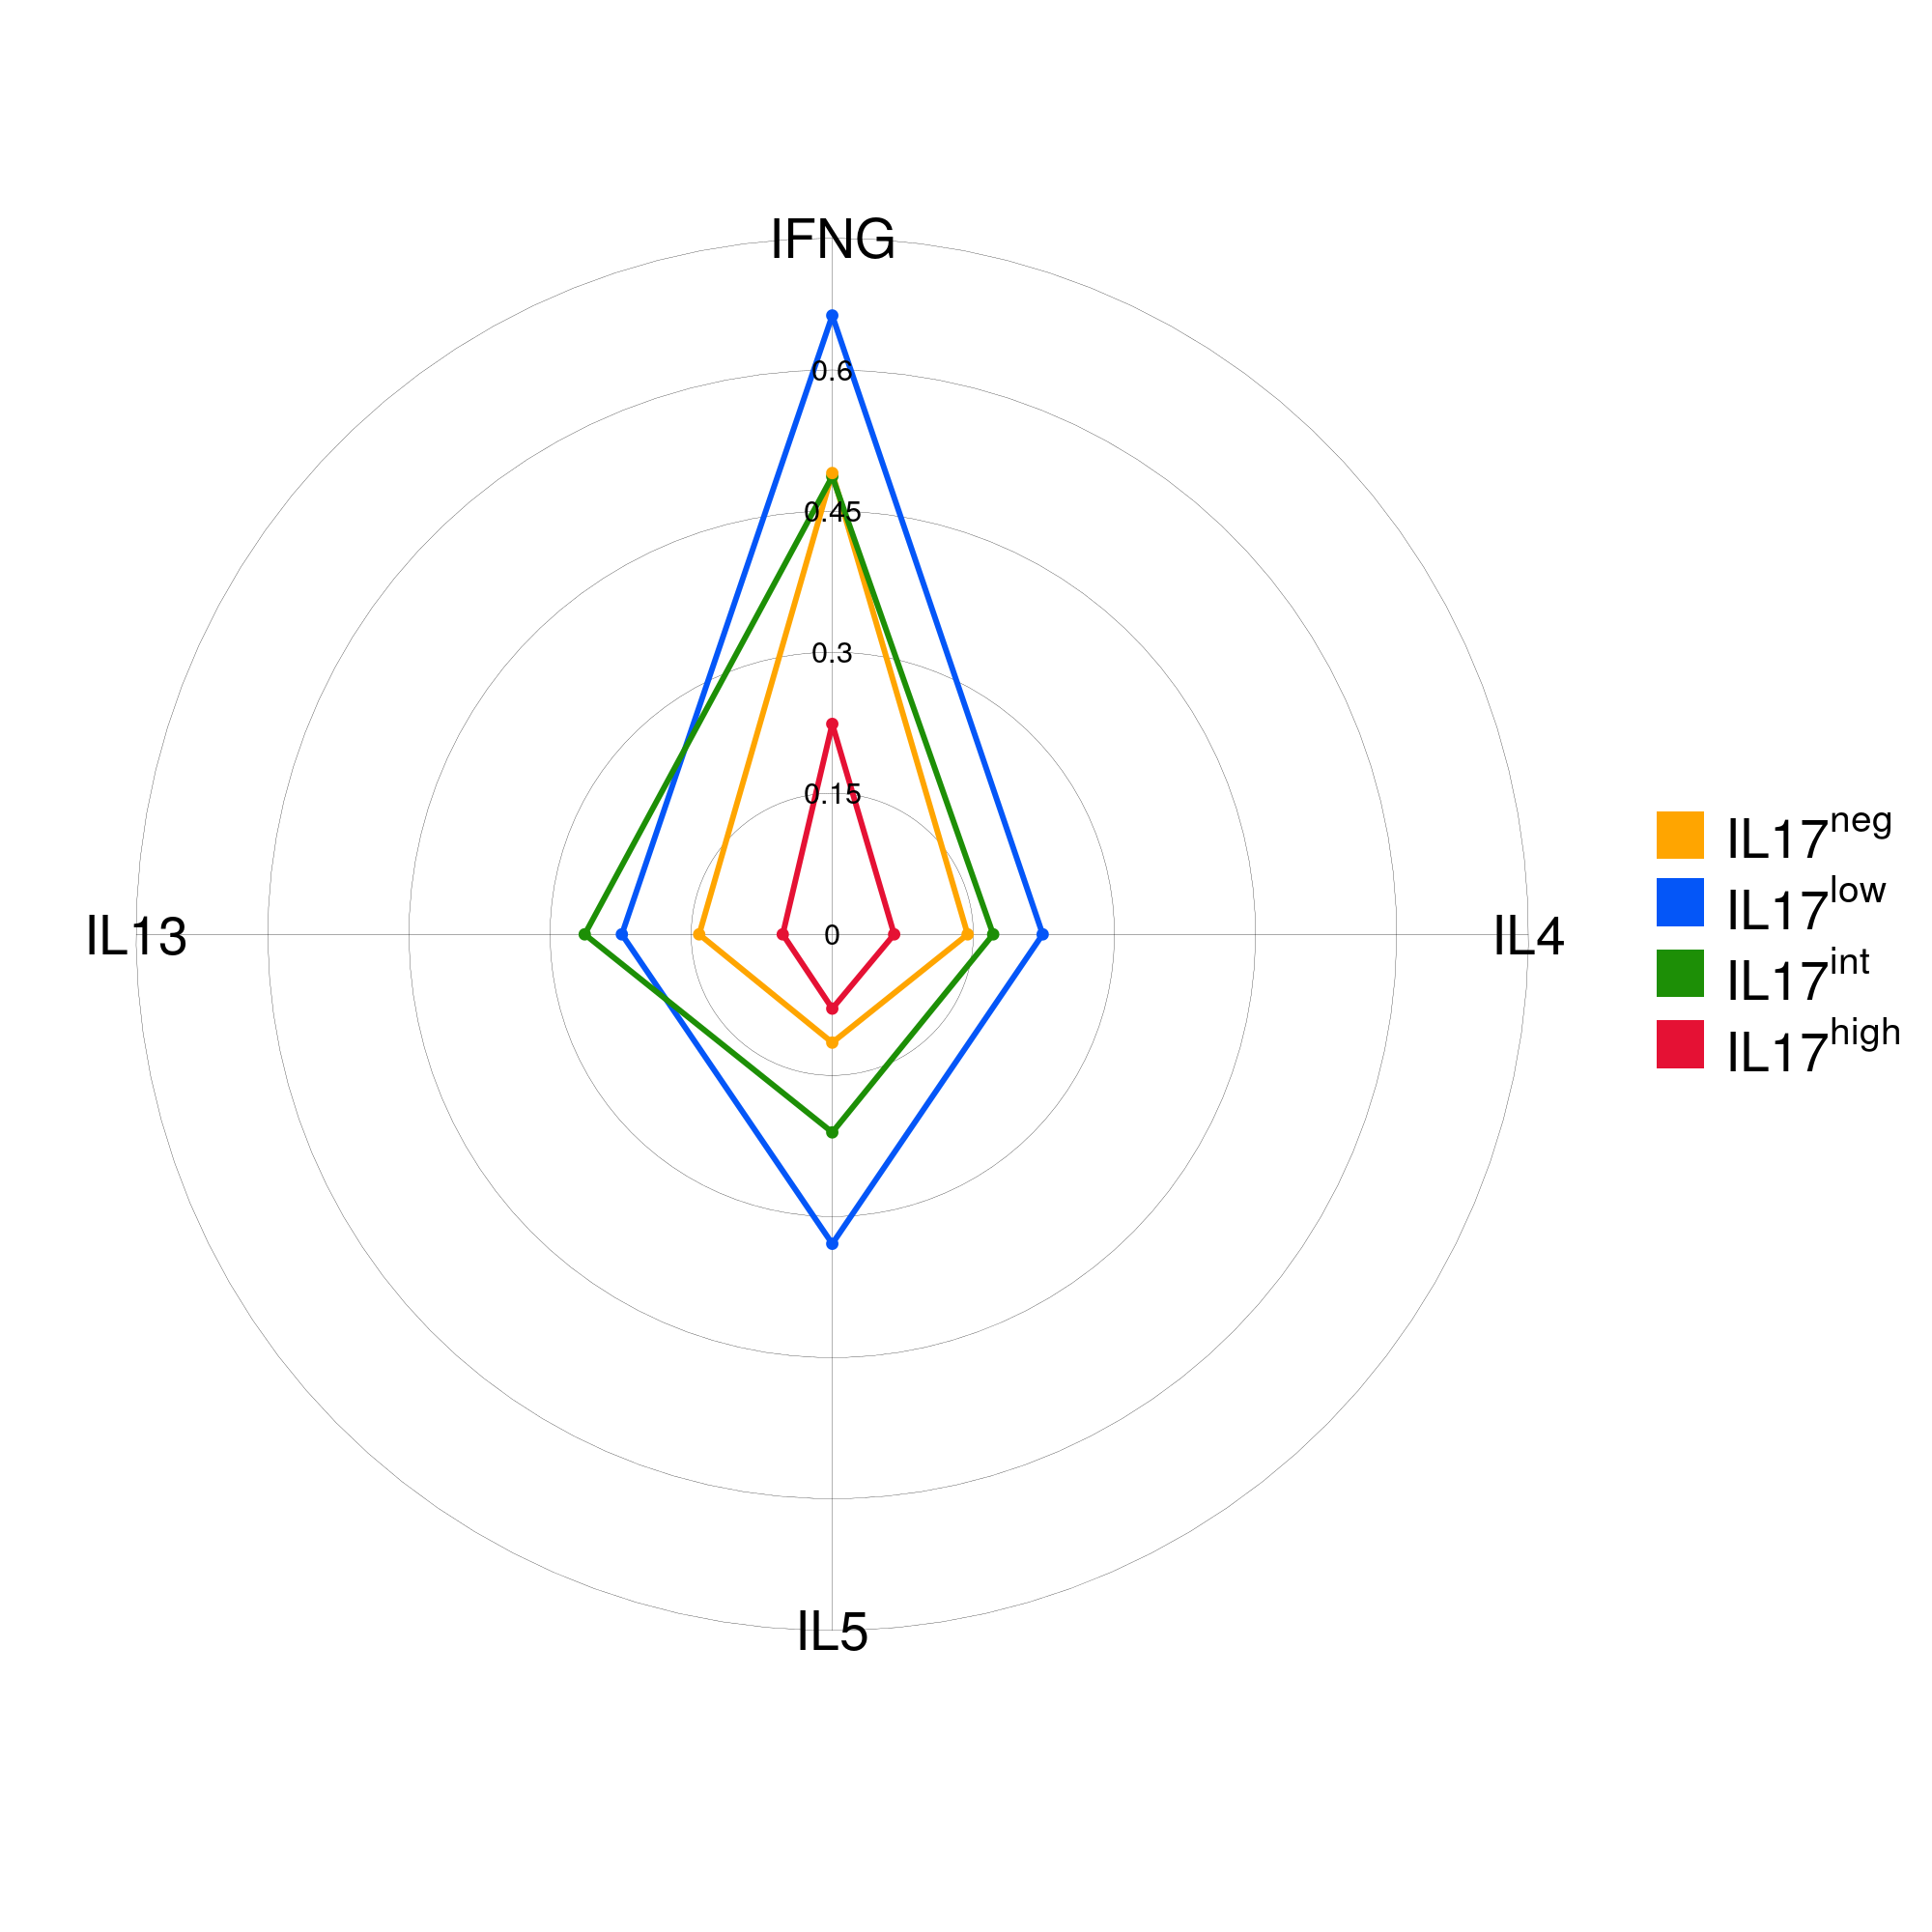

In [63]:
radarPlot_Object_List[[1]]

Warning message in as_grob.default(plot):
“Cannot convert object of class tbl_dftbldata.frame into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class list into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class ScalesListggprotogg into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class uneval into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class themegg into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class CoordPolarCoordPolarCoordggprotogg into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class FacetNullFacetggprotogg into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class environment into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class list into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of clas

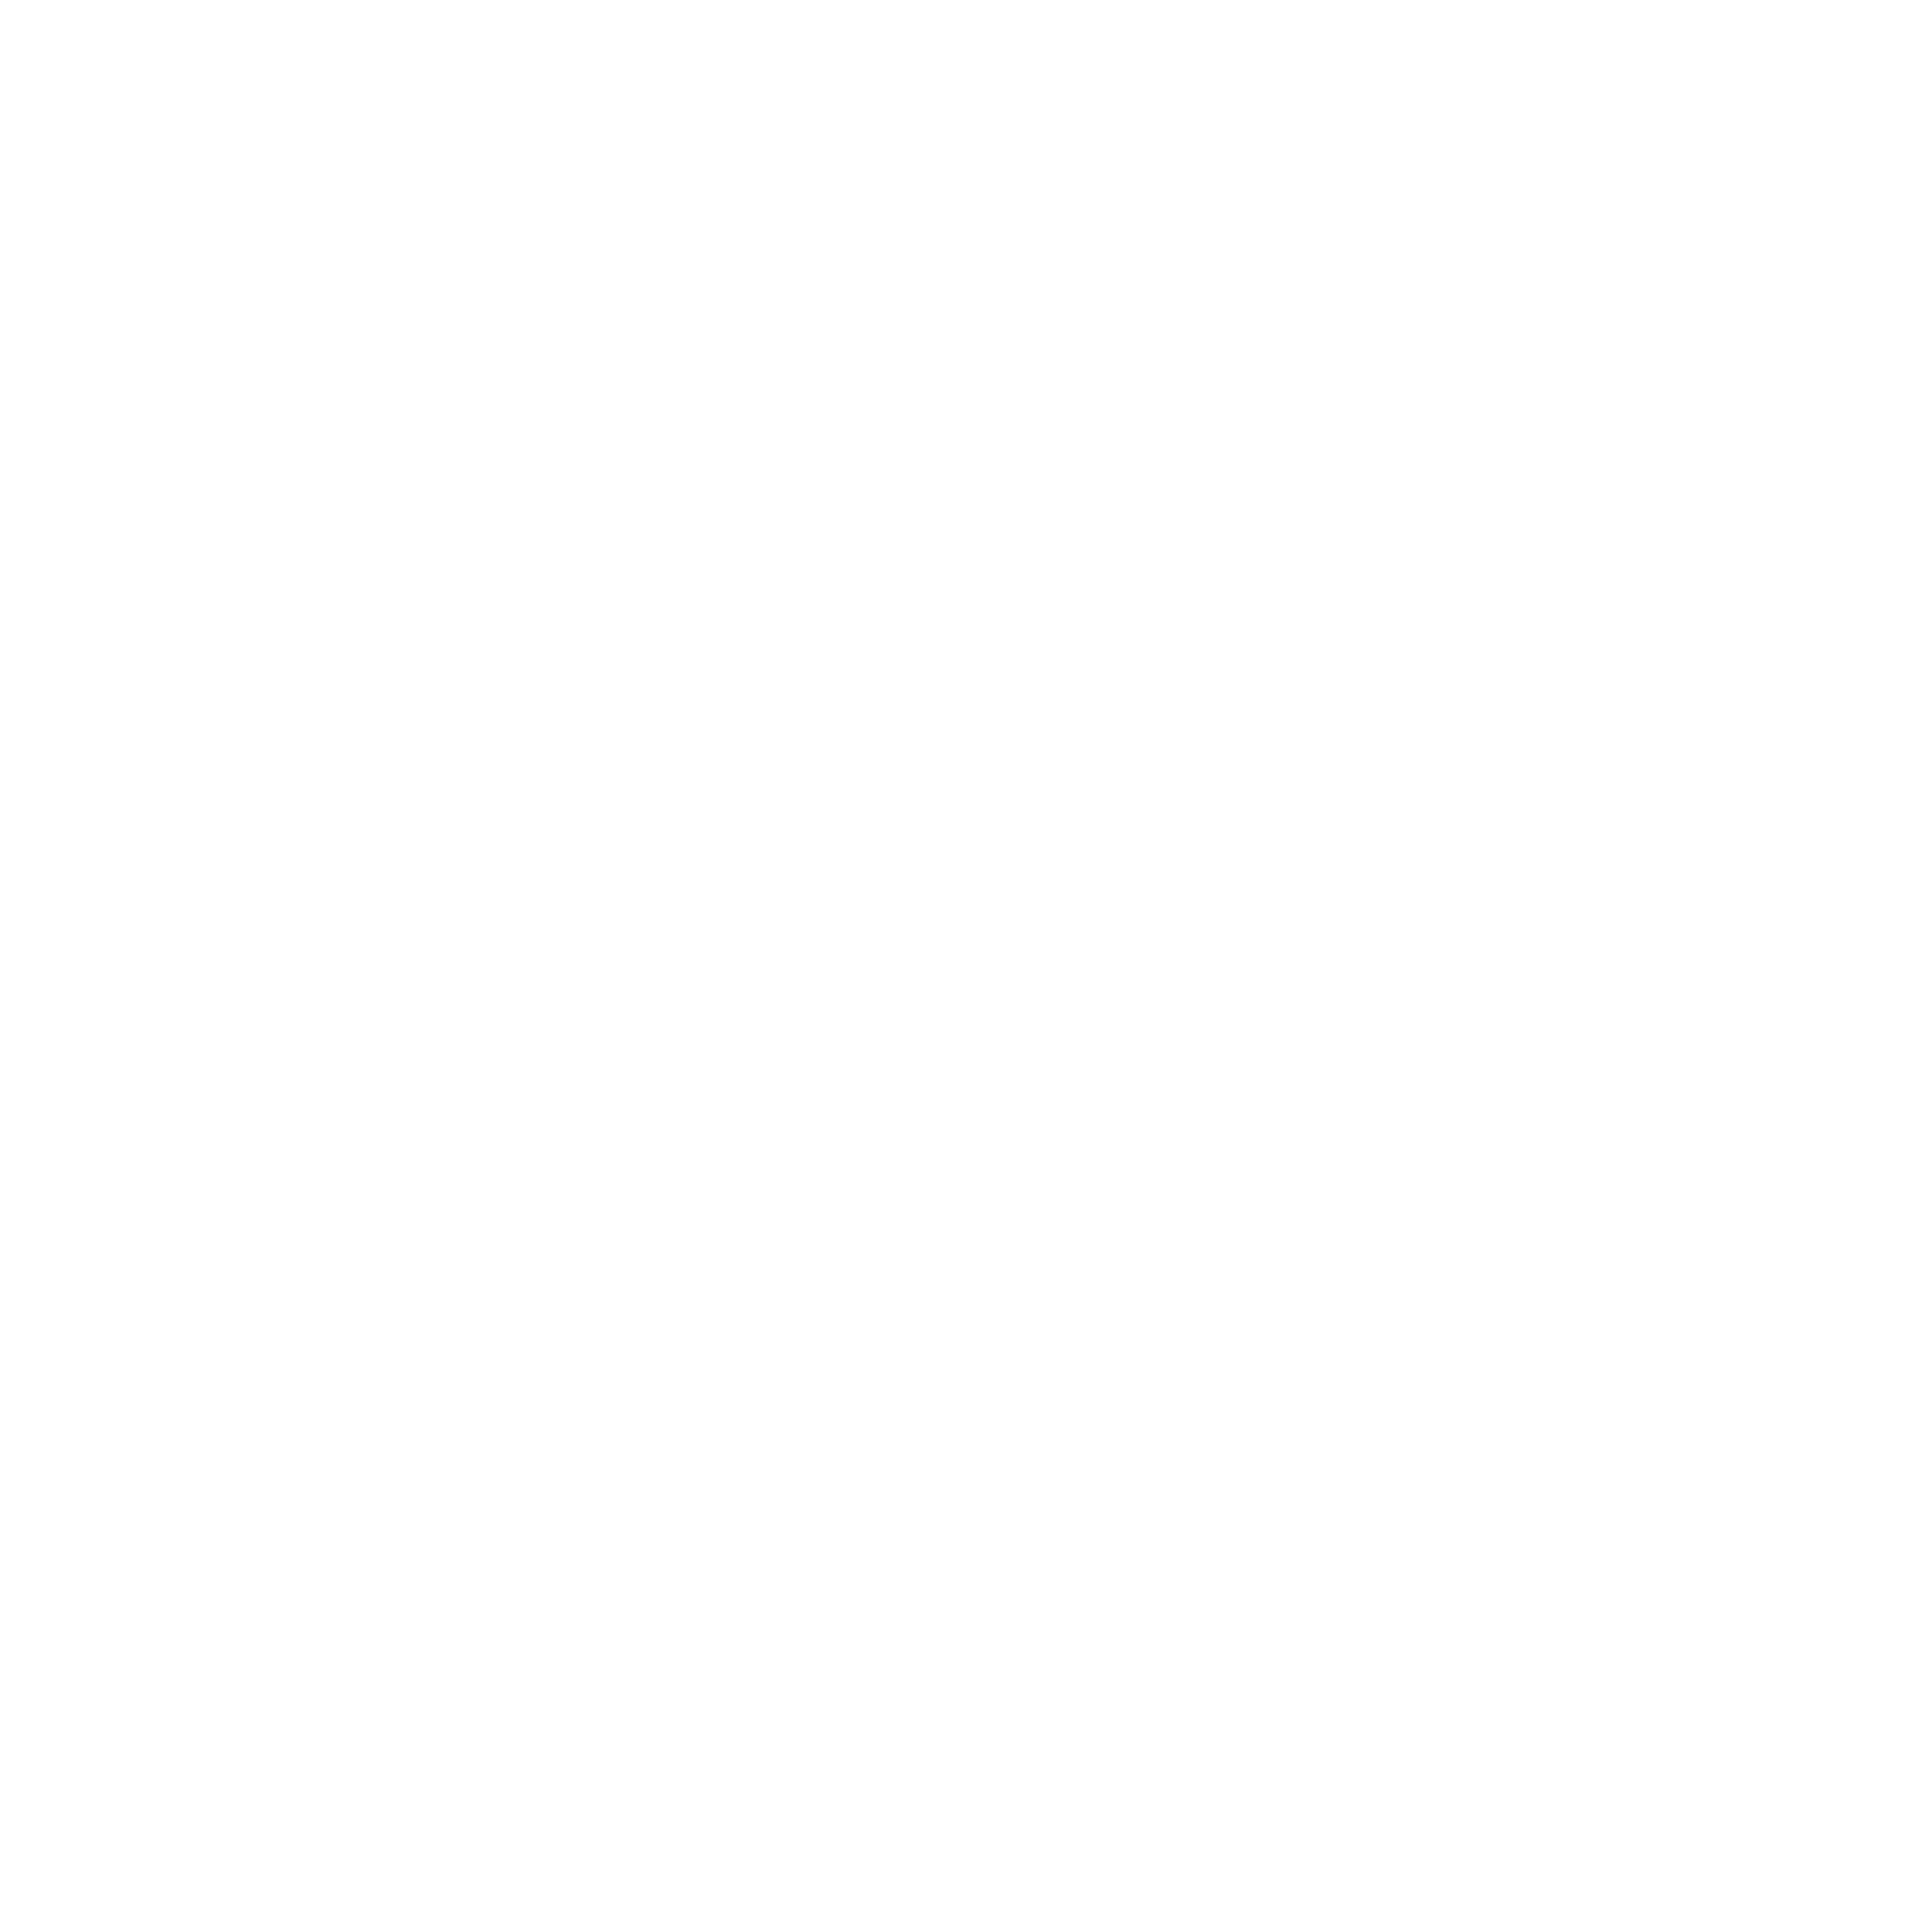

In [31]:
options(repr.plot.width=10, repr.plot.height=10, repr.plot.res=200)
Radar_Plot = plot_grid(plotlist=radarPlot_Object_List[[1]], ncol=1)
Radar_Plot

In [12]:
##################
# SAVE PDF
##################
ggsave(file="../Result/Fluidigm_scRNA_RadarPlot.pdf", device=cairo_pdf, plot=Radar_Plot, width = 15, height = 15, units = "in", dpi=1200)

In [82]:
##################
# SAVE PDF
##################
ggsave(file="../Result/Fluidigm_scRNA_RadarPlot_3.png", device="png", plot=radarPlot_Object_List[[3]], width = 7, height = 7, units = "in", dpi=600)

In [11]:
##################
# SAVE OBJECT
##################
Radar_Plot = plot_grid(Radar_Plot, nrow=1)
saveRDS(Radar_Plot, "../Object/Fluidigm_scRNA_RadarPlot.rds")